In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
path = '../input/rsna-bone-age/boneage-training-dataset.csv'
df = pd.read_csv(path)
df.head()

In [ ]:
df.info()

In [22]:
import imageio

filename = '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10000.png'

img = imageio.imread(filename)
img.meta

Dict()

The image does not contain metadata. So we cannot get more information from the image other than the image itself.

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap ='gray')
plt.axis('off')
plt.show()

In [35]:
# Img preprocessing
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# Path
image_path = "../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/"

#function to load folder into arrays andthen it returns that same array
def loadImages(path):
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path) if file.endswith('.png')])
    return image_files

In [36]:
list_images = loadImages(image_path)
print(list_images)

['../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10000.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10001.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10002.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10003.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10004.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10005.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10006.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10007.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10008.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10009.png', '../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/10010.png', '../input/rsna-bone-age/boneage-training-dataset/bone

In [41]:
def processing(data):
    # Loading img
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:5]]
    print('Original size',img[0].shape)
    
    
    # Setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[1].shape)
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)
    
    return res_img

Original size (1653, 1334)
RESIZED (220, 220)


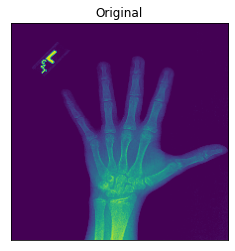

In [42]:
images = processing(list_images)

In [43]:
images[0].shape

[array([[237, 165,  97, ...,  14,  14,  15],
        [237, 172,  97, ...,  14,  14,  15],
        [237, 169,  99, ...,  15,  14,  15],
        ...,
        [ 34,  30,  29, ...,  30,  31,  49],
        [ 85,  76,  77, ...,  31,  31,  49],
        [211, 200, 197, ...,  31,  32,  50]], dtype=uint8),
 array([[ 0,  0,  0, ...,  0,  3,  2],
        [ 0,  0,  0, ...,  2,  4,  4],
        [ 0,  0,  0, ...,  0,  2,  6],
        ...,
        [ 0,  0,  0, ...,  5,  6, 12],
        [ 0,  0,  0, ...,  7,  6,  8],
        [ 0,  0,  0, ...,  5,  7,  5]], dtype=uint8),
 array([[ 86,  55,  57, ..., 113, 112, 114],
        [ 62,  29,  26, ...,  66,  67,  68],
        [ 48,  13,   8, ...,  37,  37,  37],
        ...,
        [ 19,  17,  17, ...,  23,  51, 107],
        [ 18,  19,  18, ...,  25,  53, 110],
        [ 53,  53,  52, ...,  26,  53, 111]], dtype=uint8),
 array([[255, 254, 252, ..., 255, 255, 255],
        [240, 194, 181, ..., 255, 255, 255],
        [187, 107,  92, ..., 193, 206, 222],
       